In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib.cm as cm
from numba import jit

In [2]:
df = pd.read_csv("../../data/raw/trial2_fish1.csv")
df.columns

Index(['frame', 'ACCELERATION#wcentroid (cm/s2)', 'ANGLE#wcentroid',
       'ANGULAR_A#centroid', 'ANGULAR_V#centroid',
       'BORDER_DISTANCE#wcentroid (cm)', 'NEIGHBOR_DISTANCE (cm)',
       'SPEED#wcentroid (cm/s)', 'SPEED#smooth#wcentroid (cm/s)',
       'VX#wcentroid (cm/s)', 'VY#wcentroid (cm/s)', 'X#wcentroid (cm)',
       'Y#wcentroid (cm)', 'time#centroid'],
      dtype='object')

In [3]:
df[np.isinf(df)].count()

frame                                  0
ACCELERATION#wcentroid (cm/s2)      1966
ANGLE#wcentroid                     1966
ANGULAR_A#centroid                  1966
ANGULAR_V#centroid                  1966
BORDER_DISTANCE#wcentroid (cm)      1966
NEIGHBOR_DISTANCE (cm)            357097
SPEED#wcentroid (cm/s)              1966
SPEED#smooth#wcentroid (cm/s)       1966
VX#wcentroid (cm/s)                 1966
VY#wcentroid (cm/s)                 1966
X#wcentroid (cm)                    1966
Y#wcentroid (cm)                    1966
time#centroid                       1966
dtype: int64

In [4]:
df.drop(['NEIGHBOR_DISTANCE (cm)'], axis=1, inplace=True)
num_frames = len(df)
time_original = df['time#centroid']
df['time'] = pd.Series(np.array(df.index)/100.0, index=df.index)
df = df.replace([-np.inf, np.inf], np.nan).dropna()

In [5]:
(np.ediff1d(time_original) > (0.01 + 0.001)).sum()

/home/lukas/bin/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:86: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]
/home/lukas/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


1665

In [6]:
np.ediff1d(time_original)

/home/lukas/bin/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:86: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


array([ 0.01    ,  0.010001,  0.01    , ...,  0.010009,  0.01001 ,  0.01001 ])

In [7]:
np.mean((df['time#centroid'] - df['time']))

7.661152694527061

In [8]:
len(df)/time_original.values[-1]

98.791960190320978

In [9]:
df.columns

Index(['frame', 'ACCELERATION#wcentroid (cm/s2)', 'ANGLE#wcentroid',
       'ANGULAR_A#centroid', 'ANGULAR_V#centroid',
       'BORDER_DISTANCE#wcentroid (cm)', 'SPEED#wcentroid (cm/s)',
       'SPEED#smooth#wcentroid (cm/s)', 'VX#wcentroid (cm/s)',
       'VY#wcentroid (cm/s)', 'X#wcentroid (cm)', 'Y#wcentroid (cm)',
       'time#centroid', 'time'],
      dtype='object')

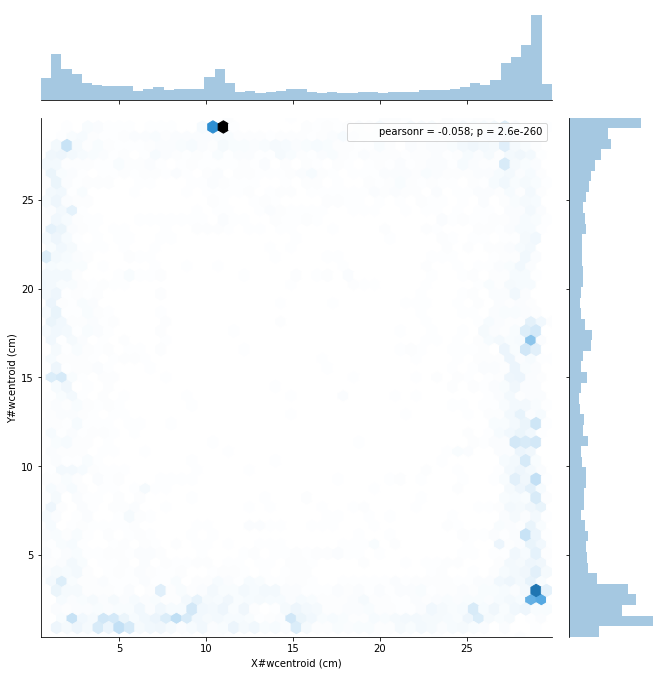

In [10]:
# Look at the density of the position.
x = df['X#wcentroid (cm)']
y = df['Y#wcentroid (cm)']
fig = sns.jointplot(x,y, kind='hex')
fig.fig.set_figwidth(10)
fig.fig.set_figheight(10)

In [11]:
len(x)

355131

In [12]:
df.columns

Index(['frame', 'ACCELERATION#wcentroid (cm/s2)', 'ANGLE#wcentroid',
       'ANGULAR_A#centroid', 'ANGULAR_V#centroid',
       'BORDER_DISTANCE#wcentroid (cm)', 'SPEED#wcentroid (cm/s)',
       'SPEED#smooth#wcentroid (cm/s)', 'VX#wcentroid (cm/s)',
       'VY#wcentroid (cm/s)', 'X#wcentroid (cm)', 'Y#wcentroid (cm)',
       'time#centroid', 'time'],
      dtype='object')

In [13]:
kicks = pd.read_csv('../../data/processed/kicks_guy.csv')
kicks.columns

Index(['fish_id', 'heading_change', 'duration', 'length', 'max_vel',
       'neighbor_distance', 'neighbor_angle', 'geometric_leader',
       'viewing_angle_ltf', 'viewing_angle_ftl', 'rel_orientation',
       'wall_distance0_f0', 'wall_distance1_f0', 'wall_distance2_f0',
       'wall_distance3_f0', 'wall_angle0_f0', 'wall_angle1_f0',
       'wall_angle2_f0', 'wall_angle3_f0', 'wall_distance0_f1',
       'wall_distance1_f1', 'wall_distance2_f1', 'wall_distance3_f1',
       'wall_angle0_f1', 'wall_angle1_f1', 'wall_angle2_f1', 'wall_angle3_f1'],
      dtype='object')

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3003d63e80>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3002339320>]], dtype=object))

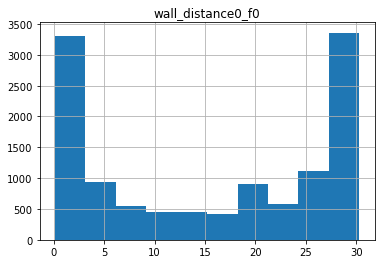

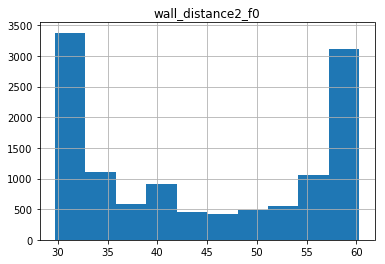

In [14]:
kicks.hist('wall_distance0_f0'), kicks.hist('wall_distance2_f0')

In [15]:
df_smooth = pd.read_csv('../../data/processed/cleaned_guy.csv')

In [16]:
(df_smooth.status == 'stopping').sum()

2052

In [17]:
np.rad2deg(kicks.wall_angle_f0)

AttributeError: 'DataFrame' object has no attribute 'wall_angle_f0'

In [ ]:
[ f"wall_{type}{wall}_{id}" for id, type, wall in product( ['f0', 'f1'], ['distance', 'angle'],[0,1,2,3], )]

In [ ]:
from itertools import product